<a href="https://colab.research.google.com/github/JosseBergUiB/GEOV181_2025_Rain_station/blob/main/GEOV181_2025_Rain_station.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Weather and Climate Exercise 2: Make your own weather station

Collect weather data for a site in Bergen using low-cost sensors. For this exercise you will work in pairs to design and build a simple weather station to install at a (safe, secure) location of your choice in Bergen. Over the next two weeks, you will use your weather station to collect observations of  rainfall at your site that you will use for analysis in the final week of the module and for your hand-in assignment.

Visualisation and analysis of the results from your home weather station and comparison of these with an equivalent period of observations from MET Norway.

**Researchers names:**

**Location of the rain station:**

You can choose yourself how to load your data. Below an example code for an excel file.

In [9]:
# Load your data
import pandas as pd

from google.colab import files
uploaded = files.upload()

# Read the Excel file into a DataFrame
df_HS = pd.read_excel('Rain_data.xlsx')

# Display the first few rows
print(df_HS.head())


Saving Rain_data.xlsx to Rain_data (1).xlsx
        Date  Rain (mm)
0 2025-10-18         10
1 2025-10-19         50
2 2025-10-20         60
3 2025-10-21         20
4 2025-10-22         30


Check if Python recognizes your dates as dates, for example with the code below.

If the column containing your dates says "datetime" you are good to go.

Does it not say "datetime" remove the # from the code block below, and try again.

In [10]:
df_HS.info()

#if your data is not recognized:
#df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
#df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       11 non-null     datetime64[ns]
 1   Rain (mm)  11 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 308.0 bytes


Your data should now be readable. Lets visualise your date. It is important to think about how to visualise the amount of rain in your plot. Which plot is most suited?

Below you find example code. Read it carefully and adjust.

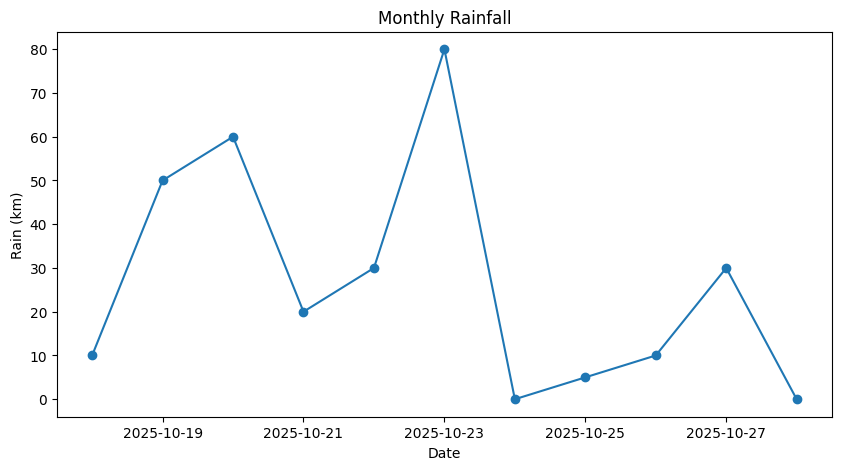

In [11]:
#example code
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(df_HS['Date'], df_HS['Rain (mm)'])

plt.title('Monthly Rainfall')
plt.xlabel('Date')
plt.ylabel('Rain (km)')
plt.show()


Think about your data and try to answer the following questions:
1) Which day had the most rain?
2) Which day had the least amount of rain?
3) What was the average rain per day?

In [ ]:
#code here

Lets compare your results with the results from the MET instituate in Bergen. Do not forget to change the days of the refrencetime to the days you are interested in (time you had your rain station out as well).

Create a user id here: https://frost.met.no/howto.html.

In [ ]:
# Libraries needed
import requests
import pandas as pd

# Insert your own client ID here
client_id = '<INSERT CLIENT ID HERE>'

In [ ]:
# Define endpoint and parameters to collect air temperature data
endpoint = 'https://frost.met.no/observations/v0.jsonld'
parameters = {
    'sources': 'SN50539',
    'elements': 'mean(air_temperature P1D)',
    'referencetime': '2023-01-01/2023-12-31',
}
# Issue an HTTP GET request
r = requests.get(endpoint, parameters, auth=(client_id,''))
# Extract JSON data
json = r.json()

In [ ]:
# Check if the request worked, print out any errors
if r.status_code == 200:
    data = json['data']
    print('Data retrieved from frost.met.no!')
else:
    print('Error! Returned status code %s' % r.status_code)
    print('Message: %s' % json['error']['message'])
    print('Reason: %s' % json['error']['reason'])

In [ ]:
# This will return a Dataframe with all of the observations in a table format (this block contains an error, let's try the one below instead)
df = pd.DataFrame()
for i in range(len(data)):
    row = pd.DataFrame(data[i]['observations'])
    row['referenceTime'] = data[i]['referenceTime']
    row['sourceId'] = data[i]['sourceId']
    df = pd.concat([row])

df = df.reset_index()

In [ ]:
#creating an empty list
records = []

# Loop through the data
for i in range(len(data)):
    source_id = data[i]['sourceId']  # Accessing sourceId directly
    reference_time = data[i]['referenceTime']  # Accessing referenceTime directly
    observation = data[i]['observations'][0]  # Get the first (and only) observation

    # Create a record with the necessary fields
    record = {
        'sourceId': source_id,
        'referenceTime': reference_time,
        'value': observation['value'],
        'unit': observation['unit'],
        'timeOffset': observation['timeOffset'],
        'timeResolution': observation['timeResolution'],
        'timeSeriesId': observation['timeSeriesId'],
        'performanceCategory': observation['performanceCategory'],
        'exposureCategory': observation['exposureCategory'],
        'qualityCode': observation['qualityCode'],
    }

    # Append the record to the records list
    records.append(record)

# Create the dataFrame
df = pd.DataFrame(records)

In [ ]:
# This defines the columns will be kept in your second dataframe
columns = ['sourceId','referenceTime','value','unit','timeOffset']
df2 = df[columns].copy()
# Convert the time value to something Python understands
df2['referenceTime'] = pd.to_datetime(df2['referenceTime'])

Lets plot this rain data as well. You can copy the plot code from the plot before and make some small changes/copy the plot code from the previous class (but think about how to plot rain data!) or challange yourself and try to plot both your data and the data from the MET in once plot.

In [ ]:
#code here

Lets answer the same questions as before, but this time about the MET data.

1) Which day had the most rain?
2) Which day had the least amount of rain?
3) What was the average rain per day?

In [ ]:
#code here

Finally, write a short comparison. Does your data correspond with the MET data? What was the same/different? Why would that be?